# Transfer Learning with TensorFlow Part 1: Feature Extraction #

Transfer learninig is leveraging an existing model's learned patterns and architecture for our own problems.

There are two main benefits:
1. Can leverage an existing neural network architecture proven to work on problems similar to our own.
2. Can leverage a working neural network architecture which has already learned patterns on similar data to our own. Then we can adapt those patterns to our own data.



In [1]:
!pip uninstall tensorflow

Found existing installation: tensorflow 2.17.0
Uninstalling tensorflow-2.17.0:
  Would remove:
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.10/dist-packages/tensorflow-2.17.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/tensorflow/*
Proceed (Y/n)? y
  Successfully uninstalled tensorflow-2.17.0


In [6]:
!pip install tensorflow==2.15.0

In [7]:
!tensorflow --version

/bin/bash: line 1: tensorflow: command not found


In [8]:
#Are we using a GPU?
!nvidia-smi

Wed Oct 30 19:46:04 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

### Downloading and becoming one with the data ###

In [10]:
# Get data (10% of 10 food classes from Food101)
import zipfile

#Download the data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

#Unzip the downloaded file
zip_ref = zipfile.ZipFile("10_food_classes_10_percent.zip")

zip_ref.extractall()
zip_ref.close()

#unzip our custom data set (cars and trucks)
zip_ref = zipfile.ZipFile("cars_and_trucks.zip")

zip_ref.extractall()
zip_ref.close()


--2024-10-30 19:47:08--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.137.207, 142.250.101.207, 142.251.2.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.137.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip.1’

10_food_classes_10_ 100%[===================>] 160.74M   245MB/s    in 0.7s    

2024-10-30 19:47:09 (245 MB/s) - ‘10_food_classes_10_percent.zip.1’ saved [168546183/168546183]



In [11]:
# How many images in each folder?
import os

#Walk through 10 percent data directory and list number of files

for dirpath, dirnames, filenames in os.walk("10_food_classes_10_percent"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} files in {dirpath}.")

There are 2 directories and 0 files in 10_food_classes_10_percent.
There are 10 directories and 0 files in 10_food_classes_10_percent/train.
There are 0 directories and 75 files in 10_food_classes_10_percent/train/sushi.
There are 0 directories and 75 files in 10_food_classes_10_percent/train/pizza.
There are 0 directories and 75 files in 10_food_classes_10_percent/train/ramen.
There are 0 directories and 75 files in 10_food_classes_10_percent/train/chicken_wings.
There are 0 directories and 75 files in 10_food_classes_10_percent/train/fried_rice.
There are 0 directories and 75 files in 10_food_classes_10_percent/train/steak.
There are 0 directories and 75 files in 10_food_classes_10_percent/train/ice_cream.
There are 0 directories and 75 files in 10_food_classes_10_percent/train/grilled_salmon.
There are 0 directories and 75 files in 10_food_classes_10_percent/train/hamburger.
There are 0 directories and 75 files in 10_food_classes_10_percent/train/chicken_curry.
There are 10 director

## Creating dataloaders ##
We'll use the imagedatagenerator class to turn our images into batches



In [12]:
#Setup data inputs
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SHAPE = (224,224)
BATCH_SIZE = 32
#EPOCHS = 5

train_dir = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

train_dir_cars_trucks = "cars_and_trucks/train/"
test_dir_cars_trucks = "cars_and_trucks/test/"

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

#train_datagen_cars_trucks = ImageDataGenerator(rescale=1/255.)
#test_datagen_cars_trucks = ImageDataGenerator(rescale=1/255.)

print("Training images (cars/trucks):")
train_data_cars_trucks = train_datagen.flow_from_directory(train_dir_cars_trucks,
                                                           target_size=IMAGE_SHAPE,
                                                           batch_size=BATCH_SIZE,
                                                           class_mode="binary")

print("Testing data (cars/trucks):")
test_data_cars_trucks = test_datagen.flow_from_directory(test_dir_cars_trucks,
                                                         target_size=IMAGE_SHAPE,
                                                         batch_size=BATCH_SIZE,
                                                         class_mode="binary")

print("Training Images:")
train_data_10_percent = train_datagen.flow_from_directory(train_dir,
                                                          target_size=IMAGE_SHAPE,
                                                          batch_size=BATCH_SIZE,
                                                          class_mode="categorical")

print("Testing images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=IMAGE_SHAPE,
                                             batch_size=BATCH_SIZE,
                                             class_mode="categorical")

Training images (cars/trucks):
Found 19 images belonging to 2 classes.
Testing data (cars/trucks):
Found 6 images belonging to 2 classes.
Training Images:
Found 750 images belonging to 10 classes.
Testing images:
Found 2500 images belonging to 10 classes.


#Setting up callbacks (things to run while our model trains)
Callbacks are extra functionality that you can add to your models to be performed during or after training.  Some of the most popular callbacks:

1. Tracking experiments with the TensorBoard callback
2. Model checkpointing with the ModelCheckpoint callback
3. Stopping a model from training before it trains too long and overfits with the EarlyStopping callback.

In [13]:
# Create TensorBoard callback (funtionized because we need to create a new one for each model)
import datetime

def create_tensorboard_callback(dir_name, experiment_name):
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)
  print(f"Saving TensorBoard log files to {log_dir}")
  return tensorboard_callback

🔑 *** Note: *** You can customize the directory where your tensorboard logs (model training metrics) get saved to whatever you like.  The log_dir parameter we've created above is only one option.

## Creating models using TensorFlow Hub.  
 In the past we've used TensorFlow to create our own models layer by layer from scratch.

 Now we're going to do a similar process except the majority of our model's layers are going to come from our TensorFlow hub.  
 We can access pretrained models on tfhub.dev

In [14]:
# Let's compare the following 2 models:
resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/5"
efficientnet_url = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"



In [15]:
# Import dependencies
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers
import matplotlib.pyplot as plt



In [16]:
#Let's make a create-model function to create a model from a URL
def create_model(model_url, num_classes=10, output_layer="softmax"):
  """
  takes a TFhub URL and creates a Keras Sequential model with it

  Args:
    model_url (str): A TensorFlow Hub feature extraction URL
    num_classes (int): The number of output neurons in the output layers (should be equal to number of target classes, default 10)

  Returns:
    An uncompiled Keras Sequntial model with model_url as feature extractor layer and Dense output layer with num_classes output neurons
  """
  #Download the pre-trained model and save it as a Keras layer.
  feature_extractor_layer = hub.KerasLayer(model_url,
                                           trainable=False,            #Freeze the already learned patterns
                                           name="feature_extraction_layer",
                                           input_shape=IMAGE_SHAPE + (3,))

  #Create our own model
  model = tf.keras.Sequential([
    feature_extractor_layer,
    layers.Dense(num_classes, activation=output_layer, name="output_layer")
  ])

  return model

### Creating and testing ResNet Tensorflow Hub Feature Extraction Model

In [17]:
#Create resnet model
resnet_model = create_model(resnet_url,
                            num_classes = train_data_10_percent.num_classes,
                            )
#Compile the model
resnet_model.compile(loss="categorical_crossentropy",
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics="accuracy")

#Fit the model
resnet_history = resnet_model.fit(train_data_10_percent,
                 batch_size=32,
                 epochs=5,
                 validation_data=test_data,
                 validation_steps=len(test_data),
                 callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub",
                                                        experiment_name="resnet50V2")])

Saving TensorBoard log files to tensorflow_hub/resnet50V2/20241030-194720
Epoch 1/5
24/24 [==============================] - 21s 587ms/step - loss: 1.9191 - accuracy: 0.3533 - val_loss: 1.2253 - val_accuracy: 0.6192
Epoch 2/5
24/24 [==============================] - 11s 477ms/step - loss: 0.9038 - accuracy: 0.7387 - val_loss: 0.8599 - val_accuracy: 0.7300
Epoch 3/5
24/24 [==============================] - 11s 477ms/step - loss: 0.6140 - accuracy: 0.8293 - val_loss: 0.7515 - val_accuracy: 0.7664
Epoch 4/5
24/24 [==============================] - 12s 493ms/step - loss: 0.4724 - accuracy: 0.8840 - val_loss: 0.7143 - val_accuracy: 0.7724
Epoch 5/5
24/24 [==============================] - 11s 452ms/step - loss: 0.3838 - accuracy: 0.9147 - val_loss: 0.6817 - val_accuracy: 0.7800


In [18]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (  (None, 2048)              23564800  
 KerasLayer)                                                     
                                                                 
 output_layer (Dense)        (None, 10)                20490     
                                                                 
Total params: 23585290 (89.97 MB)
Trainable params: 20490 (80.04 KB)
Non-trainable params: 23564800 (89.89 MB)
_________________________________________________________________


Wow

That is incredible.  Our transfer learning feature extractor model outperformed all of the previous models we built by hand, substantially, and in a quicker training time AND with only 10 percent of the training examples.  

In [19]:
# Let's create a function to plot our loss curves
# Tidbit: you could put a function like this into a script like helper.py

# Plot the validation and training curves separately
def plot_loss_curves(history):
  """
  returns separate loss curves for training and validation metrics

  Args:
    history: tensorflow history object

  Returns:
    Plots of training/validation loss and accuracy metrics
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"])) # how many epochs did we run for?

  #Plot loss
  plt.plot(epochs, loss, label = "training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("Loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label = "training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

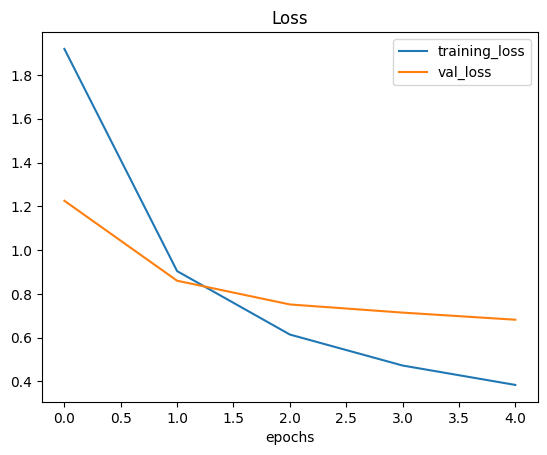

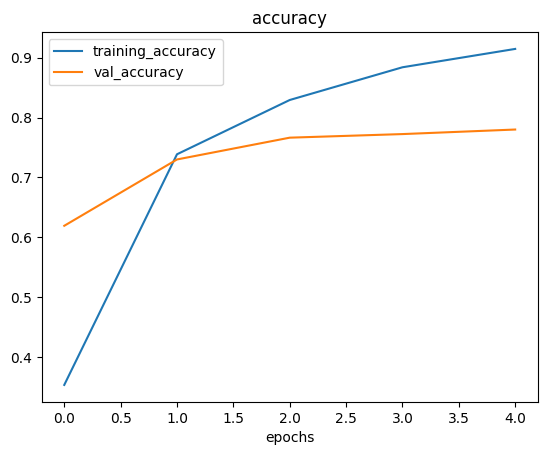

In [20]:
plot_loss_curves(resnet_history)

### Creating and testing EfficientNet TensorFlow Hub Feature Extraction Model


In [21]:
#Create our efficientnet model... details on efficientnet: https://blog.research.google/2019/05/efficientnet-improving-accuracy-and.html
efficientnet_model = create_model(efficientnet_url)

#Compile the model
efficientnet_model.compile(loss=tf.keras.losses.categorical_crossentropy,
                           optimizer=tf.keras.optimizers.Adam(),
                           metrics="accuracy")

#Fit the model
history_efficientnet = efficientnet_model.fit(train_data_10_percent,
                       batch_size=BATCH_SIZE,
                       epochs=5,
                       validation_data=test_data,
                       validation_steps=len(test_data),
                      callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub",
                                                                experiment_name="efficientnetb0")])



Saving TensorBoard log files to tensorflow_hub/efficientnetb0/20241030-194855
Epoch 1/5
24/24 [==============================] - 25s 566ms/step - loss: 1.9140 - accuracy: 0.3893 - val_loss: 1.3497 - val_accuracy: 0.6952
Epoch 2/5
24/24 [==============================] - 12s 537ms/step - loss: 1.1012 - accuracy: 0.7720 - val_loss: 0.9000 - val_accuracy: 0.8176
Epoch 3/5
24/24 [==============================] - 10s 444ms/step - loss: 0.7777 - accuracy: 0.8333 - val_loss: 0.7153 - val_accuracy: 0.8464
Epoch 4/5
24/24 [==============================] - 10s 443ms/step - loss: 0.6233 - accuracy: 0.8587 - val_loss: 0.6242 - val_accuracy: 0.8544
Epoch 5/5
24/24 [==============================] - 13s 545ms/step - loss: 0.5295 - accuracy: 0.8827 - val_loss: 0.5690 - val_accuracy: 0.8620


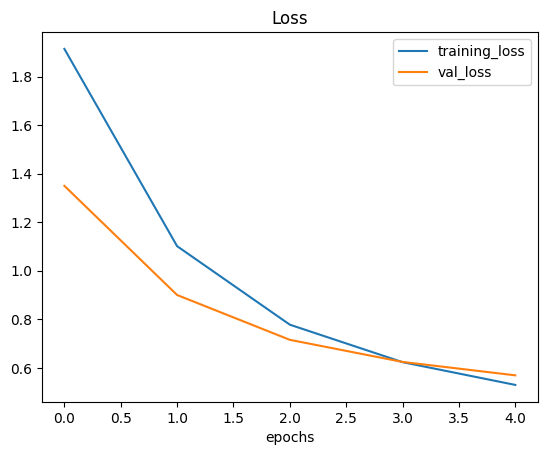

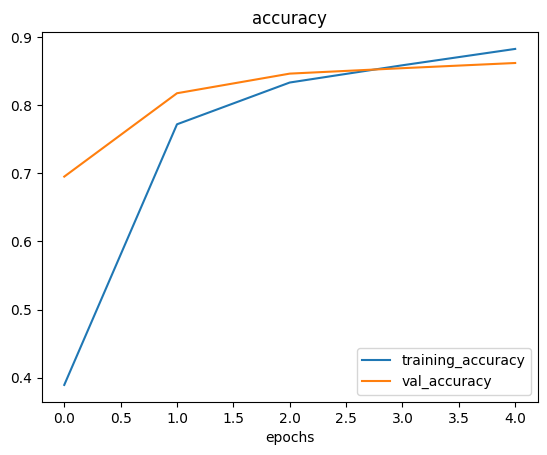

In [22]:
plot_loss_curves(history_efficientnet)

In [23]:
efficientnet_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (  (None, 1280)              4049564   
 KerasLayer)                                                     
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4062374 (15.50 MB)
Trainable params: 12810 (50.04 KB)
Non-trainable params: 4049564 (15.45 MB)
_________________________________________________________________


In [24]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (  (None, 2048)              23564800  
 KerasLayer)                                                     
                                                                 
 output_layer (Dense)        (None, 10)                20490     
                                                                 
Total params: 23585290 (89.97 MB)
Trainable params: 20490 (80.04 KB)
Non-trainable params: 23564800 (89.89 MB)
_________________________________________________________________


In [25]:
# How many layers does our efficientnetb0 feature extractor have?
len(efficientnet_model.layers[1].weights)

2

## Different types of transfer learning

* "As is" transfer learning - using an existing model with no changes whatsoever (e.g. using imagenet model on 1000 imagenet classes, none of your own)
* Feature Extraction transfer learning - using the prelearned patterns of an existing model (e.g. EfficientNetB0 trained on ImageNet) and adjust the ouput layer based on your own problem. (e.g. 1000 classes on ImageNet vs. 10 classes of food)
* Fine-tuning Transfer Learning - use the prelearned patterns of an existing model and fine-tune many or all of the underlying layers, including new output layers.

# Comparing our models' results using TensorBoard

> ** 🔑 Note: ** When you upload something to tensorboard.dev your experiments are public, so if you are running private experiments, things you dont want others to see, don't upload them to tensorboard.dev.  

In [26]:
# Upload TensorBoard dev records
#!tensorboard dev upload --logdir ./tensorflow_hub/ \
#  --name "EfficientNetB0 vs. ResNet50V2" \
#  --description "Comparing 2 different tfhub feature extraction model architectures using 10% of the training data" \
#  --one_shot

In [27]:
#Create efficientnet model with cars and trucks dataset
#Create the model
efficientnet_model_cars_trucks = create_model(efficientnet_url, num_classes=1, output_layer="sigmoid")

#Compile the model
efficientnet_model_cars_trucks.compile(loss=tf.keras.losses.binary_crossentropy,
                                       optimizer=tf.keras.optimizers.Adam(),
                                       metrics="accuracy")

#Fit the model
history_efficientnet_cars_trucks = efficientnet_model_cars_trucks.fit(train_data_cars_trucks,
                                                                      batch_size=BATCH_SIZE,
                                                                      epochs=15,
                                                                      validation_data=test_data_cars_trucks,
                                                                      validation_steps=len(test_data_cars_trucks))

Epoch 1/15
1/1 [==============================] - 13s 13s/step - loss: 0.6617 - accuracy: 0.5263 - val_loss: 0.7749 - val_accuracy: 0.1667
Epoch 2/15
1/1 [==============================] - 1s 603ms/step - loss: 0.6209 - accuracy: 0.7368 - val_loss: 0.7415 - val_accuracy: 0.3333
Epoch 3/15
1/1 [==============================] - 1s 587ms/step - loss: 0.5826 - accuracy: 0.7895 - val_loss: 0.7094 - val_accuracy: 0.5000
Epoch 4/15
1/1 [==============================] - 0s 457ms/step - loss: 0.5466 - accuracy: 0.7895 - val_loss: 0.6788 - val_accuracy: 0.5000
Epoch 5/15
1/1 [==============================] - 0s 499ms/step - loss: 0.5129 - accuracy: 0.8947 - val_loss: 0.6495 - val_accuracy: 0.5000
Epoch 6/15
1/1 [==============================] - 0s 491ms/step - loss: 0.4813 - accuracy: 0.8947 - val_loss: 0.6217 - val_accuracy: 0.6667
Epoch 7/15
1/1 [==============================] - 0s 468ms/step - loss: 0.4519 - accuracy: 0.8947 - val_loss: 0.5952 - val_accuracy: 0.6667
Epoch 8/15
1/1 [=====

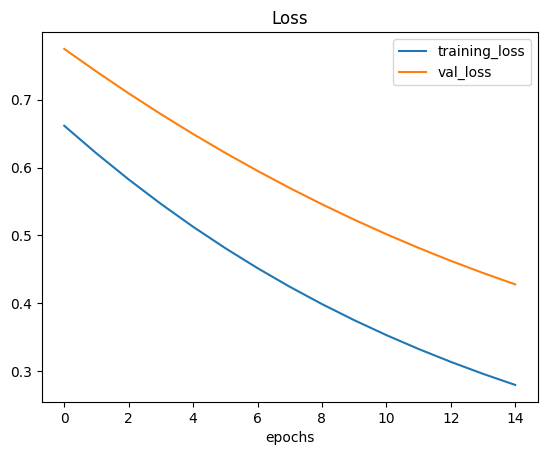

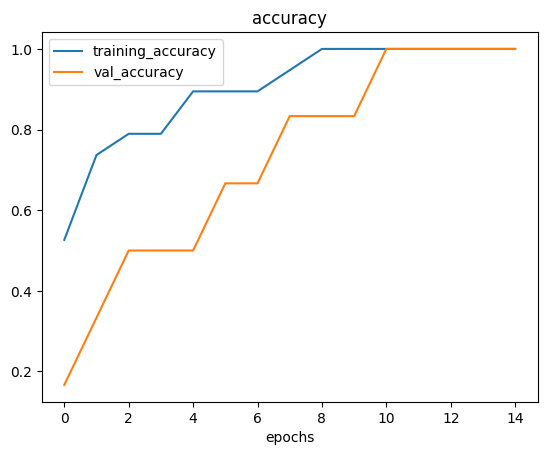

In [28]:
plot_loss_curves(history_efficientnet_cars_trucks)

In [29]:
efficientnet_model_cars_trucks.predict("/content/cars_and_trucks/train/cars/suzuki_PNG12278.png")

IndexError: tuple index out of range